In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df = df[df['job_title_short'] == 'Data Analyst']

In [8]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skills_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

skills_stats = skill_stats.sort_values(by='skills_count',ascending=False).head(10)

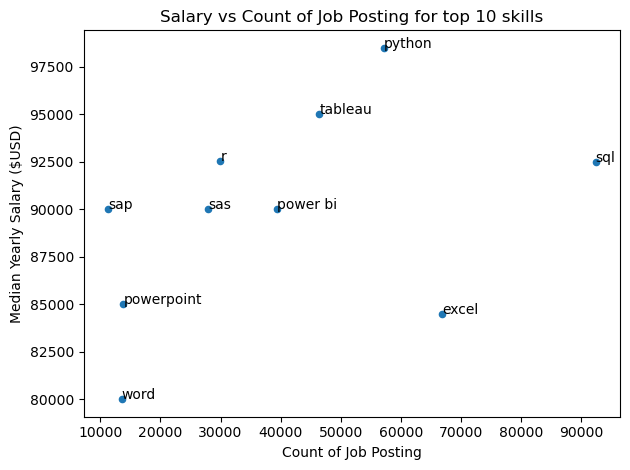

In [14]:
skills_stats.plot(kind='scatter',x='skills_count',y='median_salary')

for i,txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skills_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt)

plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Posting for top 10 skills')
plt.tight_layout()
plt.show()